# Problema del commesso viaggiatore (TSP)

## Definizione
### Dato un grafo $G(V,A)$ a cui è associato un costo $d_{ij}$ ad ogni arco $(i,j) \in A$. Il problema del commesso viaggiatore consiste nel cercare il circuito Hamiltoniano di costo minimo.
### - Un ciclo Hamiltoniano è un ciclo che attraversa tutti i nodi del grafo una ed una sola volta.
### - Il costo di un ciclo Hamiltoniano è dato dalla somma dei costi degli archi che lo compongono.

## Variabili di decisione

### <span style="color:purple">$x_{ij} \quad (i,j) \in A $ </span>  - variabile binaria uguale a $1$ se l'arco $(i,j)$ appartiene al circuito hamiltoniano, 0 altrimenti.


#### Funzione obiettivo
Minimizza il costo totale del circuito hamiltoniano

\begin{equation}
\text{Min} \quad Z = \sum_{(i,j) \in A} d_{ij} \cdot x_{ij}
\tag{0}
\end{equation}

#### Constraints
- **Vincoli di assegnamento**. In una soluzione ammissibile (circuito hamiltoniano) ogni nodo deve avere esattamente un arco entrante ed esattamente un arco uscente.

\begin{equation}
\sum_{i \in V, \ i \neq j} x_{ij} = 1 \quad \quad j \in V
\tag{1}
\end{equation}

\begin{equation}
\sum_{i \in V, \ i \neq j} x_{ji} = 1 \quad \quad j \in V
\tag{2}
\end{equation}

- **Vincoli di assenza di sottogiri**. In una soluzione ammissibile (circuito hamiltoniano) non ci possono essere cicli su un sottoinsime proprio dell'insieme dei nodi $V$.

\begin{equation}
\sum_{i,j \in S, \ (i \neq j)}x_{i,j} \leq |S|-1 \quad \quad  S \subset V
\tag{3}
\end{equation}

## Lettura file TSP e calcolo della matrice delle distanze

In [ ]:
!pip install matplotlib

In [ ]:
# Funzione per visualizzare un tour
def plot_tour(coords, tour, title):
    x = [coords[i][1] for i in tour] + [coords[tour[0]][1]]  # Coord x delle città
    y = [coords[i][2] for i in tour] + [coords[tour[0]][2]]  # Coord y delle città
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, 'o-', markersize=5, label=title)  # Plotta il tour
    for i, txt in enumerate(tour):
        plt.annotate(txt + 1, (x[i], y[i]), fontsize=8)  # Annotazione con il numero della città
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
# Funzione per stampare la matrice delle distanze in formato tabellare
def print_distance_matrix(distance_matrix):
    print("\nMatrice delle distanze (tabellare):")
    print("        ", end="")
    for i in range(len(distance_matrix)):
        print(f"C{i+1:2} ", end="")
    print()  # Nuova riga per la tabella
    for i, row in enumerate(distance_matrix):
        print(f"C{i+1:2}  ", end="")
        for value in row:
            print(f"{value:7.2f} ", end="")
        print()

In [ ]:
import numpy as np  # Libreria per la gestione di array numerici
import math  # Libreria per funzioni matematiche

# Funzione per leggere il file TSP e ottenere le coordinate delle città
def read_tsp_file(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()

    coord_section = False  # Flag per iniziare a leggere le coordinate
    coords = []  # Lista delle coordinate
    for line in lines:
        if "NODE_COORD_SECTION" in line:  # Inizia la sezione delle coordinate
            coord_section = True
            continue
        if "EOF" in line:  # Fine del file
            break
        if coord_section:
            parts = line.split()  # Divide la riga nei singoli valori
            coords.append((int(parts[0]), float(parts[1]), float(parts[2])))  # (ID città, x, y)

    return coords # Restituisce una lista di tuple contenenti (ID città, x, y).

# Funzione per calcolare la matrice delle distanze tra le città
def compute_distance_matrix(coords):
    n = len(coords)
    distance_matrix = np.zeros((n, n))  # Inizializza una matrice quadrata di zeri
    for i in range(n):
        for j in range(n):
            if i != j:  # Evita di calcolare la distanza di una città con sé stessa (che sarebbe 0 a conti fatti)
                distance_matrix[i, j] = math.sqrt((coords[i][1] - coords[j][1])**2 + (coords[i][2] - coords[j][2])**2)
    return distance_matrix


# Funzione per leggere il tour ottimale dal file
def read_optimal_tour2(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    tour_section = False
    tour = []
    for line in lines:
        if "TOUR_SECTION" in line:
            tour_section = True
            continue
        if "-1" in line or "EOF" in line:
            break
        if tour_section:
            tour.append(int(line.strip()) - 1)  # Converti gli indici da 1-based a 0-based

             # Split the line by spaces and convert each part to an integer
            #indices = [int(x) for x in line.strip().split()]
            # Extend the tour with the indices (converted to 0-based)
            #tour.extend([x - 1 for x in indices])

    return tour

def read_optimal_tour(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    tour_section = False
    tour = []
    for line in lines:
        if "TOUR_SECTION" in line:
            tour_section = True
            continue
        if "-1" in line or "EOF" in line:
            break
        if tour_section:
            # Split the line by spaces and convert each part to an integer
            indices = [int(x) for x in line.strip().split()]
            # Extend the tour with the indices (converted to 0-based)
            tour.extend([x - 1 for x in indices])

    return tour



if __name__ == "__main__":

    print("Lettura in corso...\n")

    # Lettura dei dati
    tsp_coords = read_tsp_file("ch150.tsp")
    if not tsp_coords:
        print("Errore: impossibile leggere il file TSP.")
        exit()

    # Stampa delle coordinate estratte dal file in un'unica riga
    coords_vector = [(city[1], city[2]) for city in tsp_coords]
    print("Coordinate delle città:", coords_vector)

    distance_matrix = compute_distance_matrix(tsp_coords)
    optimal_tour = read_optimal_tour("ch150.opt.tour")
    if not optimal_tour:
        print("Errore: impossibile leggere il file del tour ottimale.")
        exit()

    # Stampa della matrice delle distanze in formato tabellare
    print_distance_matrix(distance_matrix)

    print("Lettura completata con successo.")



Lettura in corso...

Coordinate delle città: [(37.4393516691, 541.2090699418), (612.1759508571, 494.3166877396), (38.1312338227, 353.1484581781), (53.4418081065, 131.484901365), (143.0606355347, 631.7200953923), (689.9451267256, 468.5354998742), (112.7478815786, 529.417757826), (141.4875865042, 504.818485571), (661.0513901702, 445.9375182115), (98.7899036592, 384.5926031158), (697.3881696597, 180.3962284275), (536.4894189738, 287.2279085051), (192.4067320507, 20.439405931), (282.7865258765, 229.8001556189), (240.8251726391, 281.51414372), (246.9281323057, 322.461332116), (649.7313216456, 62.3331575282), (352.96585626, 666.7873101942), (633.392367658, 534.9398453712), (488.311799404, 437.4869439948), (141.4039286509, 228.4325551488), (17.3632612602, 240.2407068508), (397.5586451389, 231.3591208928), (565.7853781464, 282.3858748974), (475.8975387047, 468.5392706317), (322.4224566559, 550.3165478233), (397.5586634023, 74.7588387765), (672.8618339396, 432.882640963), (571.2189680147, 530.2

## Tabu Search

Numero mosse peggiorative:1
Miglior tour trovato: [22, 37, 31, 66, 42, 108, 50, 19, 24, 140, 82, 55, 125, 92, 34, 51, 120, 87, 93, 9, 112, 2, 47, 62, 29, 83, 6, 33, 72, 75, 86, 0, 97, 102, 81, 94, 106, 4, 99, 142, 96, 7, 88, 95, 123, 145, 25, 74, 17, 141, 84, 131, 64, 54, 57, 49, 136, 134, 69, 107, 101, 113, 98, 18, 28, 85, 80, 109, 46, 1, 36, 5, 27, 8, 41, 119, 138, 39, 52, 117, 23, 11, 115, 100, 40, 56, 38, 126, 68, 35, 60, 10, 147, 129, 16, 65, 59, 139, 116, 26, 30, 122, 73, 135, 144, 111, 63, 12, 105, 90, 118, 67, 127, 44, 70, 43, 114, 149, 3, 103, 21, 61, 148, 124, 20, 78, 58, 77, 14, 132, 15, 110, 104, 32, 91, 53, 89, 45, 137, 133, 130, 76, 121, 13, 79, 71, 48, 146, 143, 128]
Costo del miglior tour: 7129.755128555863
Gap rispetto alla soluzione ottima: 9.15%
Tempo di esecuzione: 527.2822 secondi


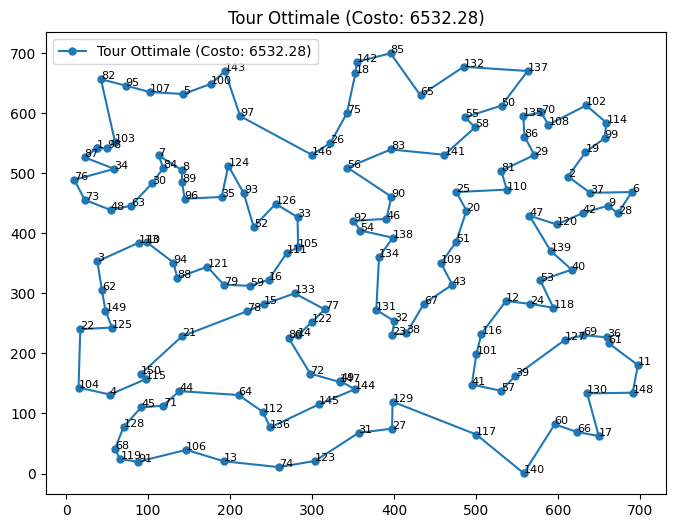

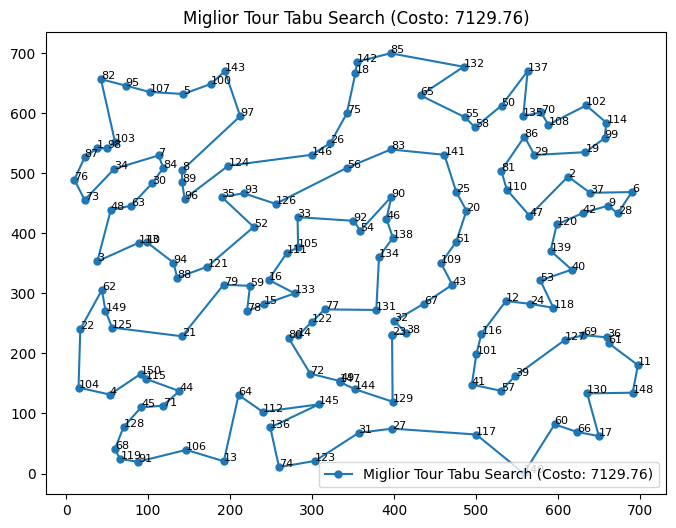

In [ ]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from collections import deque

def initialize_solution(n, seed):
    """Genera una soluzione iniziale casuale per il TSP."""
    random.seed(seed)
    np.random.seed(seed)
    solution = list(range(n))
    random.shuffle(solution)
    return solution

def evaluate_solution(solution, distance_matrix):
    """Calcola il costo totale del percorso."""
    cost = sum(distance_matrix[solution[i], solution[i+1]] for i in range(len(solution) - 1))
    return cost + distance_matrix[solution[-1], solution[0]]  # Torna alla città iniziale

def get_neighbors(solution):
    """Genera i vicini utilizzando la mossa 2-opt."""
    neighbors = []  # Lista che conterrà tutte le soluzioni vicine
    n = len(solution)  # Numero di città nel tour

    for i in range(n - 1):  # Il ciclo `i` va da 0 a n-2 per garantire che ci siano almeno due città disponibili per la mossa 2-opt
        for j in range(i + 2, n):  # Sceglie una città successiva a i (salta la città i+1)
            # Genera una nuova soluzione invertendo il segmento tra i e j
            new_solution = solution[:i+1] + solution[i+1:j+1][::-1] + solution[j+1:]
            # Aggiunge la nuova soluzione e la mossa fatta (scambio tra solution[i] e solution[j])
            neighbors.append((new_solution, (solution[i], solution[j])))

    return neighbors  # Restituisce tutte le soluzioni vicine

def get_best_candidate(neighborhood, tabu_list, current_solution, distance_matrix, worse_moves_counter):
    """
    Trova la migliore soluzione nel vicinato

    Se esiste una mossa migliorativa che non è nella tabu list, la sceglie immediatamente.
    Se non ci sono miglioramenti disponibili, sceglie la migliore tra le peggiori (mossa peggiorativa meno dannosa).

    Args:
        - neighborhood (list): Lista delle soluzioni candidate (vicini della soluzione attuale).
        - tabu_list (set): Insieme delle soluzioni proibite temporaneamente (tabu list).
        - current_solution (list): Soluzione attuale.
        - distance_matrix (numpy array): Matrice delle distanze per valutare i costi delle soluzioni.
        - worse_moves_counter (int): Contatore delle mosse peggiorative consecutive.

    Returns:
        - best_solution (list): Migliore soluzione selezionata.
        - best_cost (float): Costo della migliore soluzione trovata.
        - worse_moves_counter (int): Contatore aggiornato delle mosse peggiorative consecutive.
    """
    best_solution = current_solution.copy()  # Inizialmente, la migliore soluzione è quella corrente
    best_candidate_cost = evaluate_solution(best_solution, distance_matrix)  # Calcoliamo il costo della soluzione corrente
    best_degrading_move = None  # Inizializziamo la variabile per memorizzare la migliore mossa peggiorativa
    best_degrading_cost = float('inf')  # Inizializziamo il costo della migliore mossa peggiorativa a infinito
    has_improvement = False  # Flag per tenere traccia se abbiamo trovato una mossa migliorativa

    for s, move in neighborhood:
        cost_s = evaluate_solution(s, distance_matrix)

        # Se troviamo una soluzione migliore non tabu, la accettiamo immediatamente
        if cost_s < best_candidate_cost and move not in tabu_list:
            best_solution = s
            best_candidate_cost = cost_s
            has_improvement = True
            worse_moves_counter = 0  # Reset del contatore di mosse peggiorative
            break  # Uscita immediata per sfruttare la miglior soluzione

        # Se la soluzione è peggiorativa ma migliore delle altre peggiorative, la memorizziamo
        elif move not in tabu_list and cost_s < best_degrading_cost:
            best_degrading_move = s
            best_degrading_cost = cost_s

    # Se nessuna mossa migliorativa è stata trovata, si sceglie la migliore tra le peggiorative
    if not has_improvement and best_degrading_move is not None:
        best_solution = best_degrading_move
        best_candidate_cost = best_degrading_cost
        worse_moves_counter += 1  # Incrementiamo il contatore delle mosse peggiorative

    return best_solution, best_candidate_cost, worse_moves_counter

def tabu_search(distance_matrix, tabu_tenure=30, max_iter=2000, seed=40):
    """
    Implementazione della Tabu Search
    """
    start_time = time.time()
    n = len(distance_matrix)
    current_solution = initialize_solution(n, seed)
    current_cost = evaluate_solution(current_solution, distance_matrix)
    best_solution, best_cost = current_solution, current_cost
    tabu_list = deque(maxlen=tabu_tenure)
    worse_moves_counter = 0

    for iteration in range(max_iter):
        neighbors = get_neighbors(current_solution)
        best_candidate, new_cost, worse_moves_counter = get_best_candidate(
            neighbors, tabu_list, current_solution, distance_matrix, worse_moves_counter
        )

        if new_cost < best_cost:
            best_solution, best_cost = best_candidate, new_cost

        current_solution, current_cost = best_candidate, new_cost
        tabu_list.append(tuple(current_solution))

        if worse_moves_counter >= 50:
            print(f"Interruzione anticipata all'iterazione {iteration + 1}: mosse peggiorative consecutive {worse_moves_counter}")
            break

    print(f"Numero mosse peggiorative:{worse_moves_counter}")
    elapsed_time = time.time() - start_time
    return best_solution, best_cost, elapsed_time



if __name__ == "__main__":
    tsp_coords = read_tsp_file("ch150.tsp")
    distance_matrix = compute_distance_matrix(tsp_coords)
    optimal_tour = read_optimal_tour("ch150.opt.tour")
    optimal_cost = evaluate_solution(optimal_tour, distance_matrix)
    best_tour, best_cost, execution_time = tabu_search(distance_matrix)
    gap = abs((optimal_cost - best_cost) / optimal_cost) * 100

    print(f"Miglior tour trovato: {best_tour}")
    print(f"Costo del miglior tour: {best_cost}")
    print(f"Gap rispetto alla soluzione ottima: {gap:.2f}%")
    print(f"Tempo di esecuzione: {execution_time:.4f} secondi")

    plot_tour(tsp_coords, optimal_tour, f"Tour Ottimale (Costo: {optimal_cost:.2f})")
    plot_tour(tsp_coords, best_tour, f"Miglior Tour Tabu Search (Costo: {best_cost:.2f})")


In [ ]:
!pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.9/24.9 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 319.7/319.7 kB 28.7 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 4.25.6
    Uninstalling protobuf-4.25.6:
      Successfully uninstalled protobuf-4.25.6
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0


## Tabu Search multi-start

Output streaming troncato alle ultime 5000 righe.
Iterazione 1010: Costo attuale: 6925.989077792955, Peggioramenti consecutivi: 1
Iterazione 1011: Costo attuale: 6925.989077792953, Peggioramenti consecutivi: 0
Iterazione 1012: Costo attuale: 6925.989077792955, Peggioramenti consecutivi: 1
Iterazione 1013: Costo attuale: 6925.989077792953, Peggioramenti consecutivi: 0
Iterazione 1014: Costo attuale: 6925.989077792955, Peggioramenti consecutivi: 1
Iterazione 1015: Costo attuale: 6925.989077792953, Peggioramenti consecutivi: 0
Iterazione 1016: Costo attuale: 6925.989077792955, Peggioramenti consecutivi: 1
Iterazione 1017: Costo attuale: 6925.989077792953, Peggioramenti consecutivi: 0
Iterazione 1018: Costo attuale: 6925.989077792955, Peggioramenti consecutivi: 1
Iterazione 1019: Costo attuale: 6925.989077792953, Peggioramenti consecutivi: 0
Iterazione 1020: Costo attuale: 6925.989077792955, Peggioramenti consecutivi: 1
Iterazione 1021: Costo attuale: 6925.989077792953, Peggioramenti conse

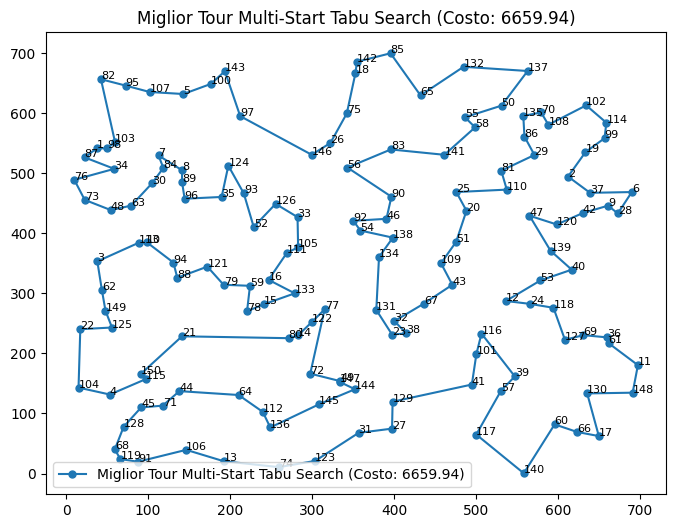

In [ ]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from collections import deque

def initialize_solution(n, seed):
    """Genera una soluzione iniziale casuale per il TSP."""
    random.seed(seed)
    np.random.seed(seed)
    solution = list(range(n))
    random.shuffle(solution)
    return solution

def evaluate_solution(solution, distance_matrix):
    """Calcola il costo totale del percorso."""
    cost = sum(distance_matrix[solution[i], solution[i+1]] for i in range(len(solution) - 1))
    return cost + distance_matrix[solution[-1], solution[0]]  # Torna alla città iniziale

def get_neighbors(solution):
    """Genera i vicini utilizzando la mossa 2-opt."""
    neighbors = []
    n = len(solution)

    for i in range(n - 1):
        for j in range(i + 2, n):
            new_solution = solution[:i+1] + solution[i+1:j+1][::-1] + solution[j+1:]
            neighbors.append((new_solution, (solution[i], solution[j])))

    return neighbors

def get_best_candidate(neighborhood, tabu_list, current_solution, distance_matrix, worse_moves_counter):
    """Trova la migliore soluzione nel vicinato senza criterio di aspirazione."""
    best_solution = current_solution.copy()
    best_candidate_cost = evaluate_solution(best_solution, distance_matrix)
    best_degrading_move = None
    best_degrading_cost = float('inf')

    for s, move in neighborhood:
        cost_s = evaluate_solution(s, distance_matrix)

        if cost_s < best_candidate_cost and move not in tabu_list:
            return s, cost_s, 0

        if move not in tabu_list and cost_s < best_degrading_cost:
            best_degrading_move = s
            best_degrading_cost = cost_s

    if best_degrading_move is not None:
        return best_degrading_move, best_degrading_cost, worse_moves_counter + 1

    return best_solution, best_candidate_cost, worse_moves_counter

def tabu_search(distance_matrix, tabu_tenure=30, max_iter=1200, seed=40):
    """Implementazione della Tabu Search"""
    start_time = time.time()
    n = len(distance_matrix)
    current_solution = initialize_solution(n, seed)
    current_cost = evaluate_solution(current_solution, distance_matrix)
    best_solution, best_cost = current_solution, current_cost
    tabu_list = deque(maxlen=tabu_tenure)
    worse_moves_counter = 0

    for iteration in range(max_iter):
        neighbors = get_neighbors(current_solution)
        best_candidate, new_cost, worse_moves_counter = get_best_candidate(
            neighbors, tabu_list, current_solution, distance_matrix, worse_moves_counter
        )

        if new_cost < best_cost:
            best_solution, best_cost = best_candidate, new_cost

        current_solution, current_cost = best_candidate, new_cost
        tabu_list.append(tuple(current_solution))

        print(f"Iterazione {iteration + 1}: Costo attuale: {current_cost}, Peggioramenti consecutivi: {worse_moves_counter}")

        if worse_moves_counter >= 50:
            break

    elapsed_time = time.time() - start_time
    return best_solution, best_cost, elapsed_time, iteration + 1

def multi_start_tabu_search(distance_matrix, max_restarts=25):
    """Approccio Multi-Start per Tabu Search."""
    best_overall_solution = None
    best_overall_cost = float('inf')
    best_gap = float('inf')
    optimal_tour = read_optimal_tour("ch150.opt.tour")
    optimal_cost = evaluate_solution(optimal_tour, distance_matrix)
    best_execution = -1
    best_time = 0

    for restart in range(max_restarts):
        seed = random.randint(0, 10000)
        best_tour, best_cost, execution_time, iteration = tabu_search(distance_matrix, seed=seed)
        gap = abs((optimal_cost - best_cost) / optimal_cost) * 100

        print(f"Restart {restart + 1}: Costo trovato {best_cost}, Gap {gap:.2f}%, Tempo {execution_time:.2f}s, Iterazioni {iteration}")

        if gap < best_gap:
            best_gap = gap
            best_overall_solution = best_tour
            best_overall_cost = best_cost
            best_execution = restart + 1
            best_time = execution_time

    print(f"Miglior risultato trovato alla esecuzione {best_execution} con un gap del {best_gap:.2f}% in {best_time:.2f} secondi.")
    return best_overall_solution, best_overall_cost, best_gap

if __name__ == "__main__":
    tsp_coords = read_tsp_file("ch150.tsp")
    distance_matrix = compute_distance_matrix(tsp_coords)
    best_tour, best_cost, best_gap = multi_start_tabu_search(distance_matrix)

    print(f"Miglior tour trovato: {best_tour}")
    print(f"Costo del miglior tour: {best_cost}")
    print(f"Gap rispetto alla soluzione ottima: {best_gap:.2f}%")

    plot_tour(tsp_coords, best_tour, f"Miglior Tour Multi-Start Tabu Search (Costo: {best_cost:.2f})")



## Solver di google

Miglior tour trovato: [0, 72, 61, 21, 63, 41, 42, 40, 55, 22, 48, 23, 17, 49, 24, 54, 30, 9, 37, 64, 65, 10, 58, 13, 52, 6, 34, 7, 18, 53, 12, 56, 14, 4, 36, 19, 69, 59, 70, 68, 35, 46, 20, 60, 27, 73, 1, 29, 47, 28, 44, 26, 51, 45, 33, 66, 25, 75, 74, 3, 67, 5, 50, 16, 39, 11, 57, 71, 38, 8, 31, 43, 2, 15, 62, 32]
Costo ottimale: 544.3690526708285


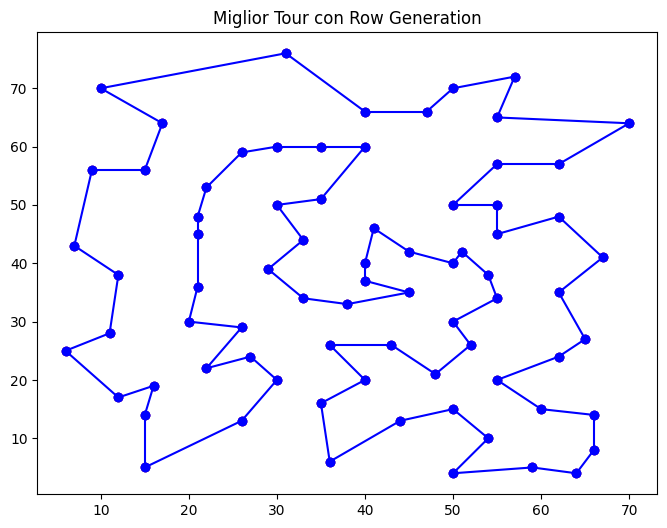

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from scipy.spatial.distance import cdist
from ortools.linear_solver import pywraplp

def read_tsp_file(filename):
    """Legge un file TSP e restituisce le coordinate delle città."""
    with open(filename, 'r') as f:
        lines = f.readlines()
    coords = []
    reading = False
    for line in lines:
        if "NODE_COORD_SECTION" in line:
            reading = True
            continue
        if "EOF" in line:
            break
        if reading:
            parts = line.strip().split()
            coords.append((float(parts[1]), float(parts[2])))
    return np.array(coords)

def solve_tsp_row_generation(distance_matrix):
    """Risoluzione del TSP con Row Generation usando Google OR-Tools."""
    n = len(distance_matrix)
    solver = pywraplp.Solver.CreateSolver('SCIP')
    if not solver:
        raise RuntimeError("Solver non disponibile")

    # Variabili binarie x[i][j]
    x = [[solver.BoolVar(f'x_{i}_{j}') for j in range(n)] for i in range(n)]

    # Vincoli: ogni nodo ha un solo arco entrante e uno uscente
    for i in range(n):
        solver.Add(sum(x[i][j] for j in range(n) if i != j) == 1)
        solver.Add(sum(x[j][i] for j in range(n) if i != j) == 1)

    # Funzione obiettivo: minimizzare la distanza totale
    solver.Minimize(solver.Sum(distance_matrix[i][j] * x[i][j] for i in range(n) for j in range(n)))

    # Risoluzione iterativa con Row Generation
    while True:
        status = solver.Solve()
        if status != pywraplp.Solver.OPTIMAL:
            return None, None

        # Creazione del grafo della soluzione
        G = nx.Graph()
        for i in range(n):
            for j in range(n):
                if x[i][j].solution_value() > 0.5:
                    G.add_edge(i, j)

        # Troviamo i sottotour
        cycles = list(nx.connected_components(G))
        if len(cycles) == 1:
            break  # Abbiamo trovato un tour valido

        # Aggiungiamo un vincolo per eliminare ogni sottotour trovato
        for cycle in cycles:
            if len(cycle) < n:
                solver.Add(sum(x[i][j] for i in cycle for j in cycle if i != j) <= len(cycle) - 1)

    # Estraiamo il percorso finale
    tour = []
    current = 0
    visited = set([0])
    while len(tour) < n:
        tour.append(current)
        for j in range(n):
            if x[current][j].solution_value() > 0.5 and j not in visited:
                current = j
                visited.add(j)
                break

    return tour, solver.Objective().Value()

def plot_tour(coords, tour, title):
    """Plotta il tour trovato."""
    plt.figure(figsize=(8, 6))
    for i in range(len(tour) - 1):
        plt.plot([coords[tour[i], 0], coords[tour[i+1], 0]],
                 [coords[tour[i], 1], coords[tour[i+1], 1]], 'bo-')
    plt.plot([coords[tour[-1], 0], coords[tour[0], 0]],
             [coords[tour[-1], 1], coords[tour[0], 1]], 'bo-')
    plt.scatter(coords[:, 0], coords[:, 1], color='red', marker='o')
    plt.title(title)
    plt.show()

# Lettura file e calcolo matrice distanze
filename = "eil76.tsp"  # Cambia con il percorso corretto
coords = read_tsp_file(filename)
distance_matrix = cdist(coords, coords)

# Risoluzione con Row Generation
tour, cost = solve_tsp_row_generation(distance_matrix)
if tour:
    print(f"Miglior tour trovato: {tour}")
    print(f"Costo ottimale: {cost}")
    plot_tour(coords, tour, "Miglior Tour con Row Generation")
else:
    print("Nessuna soluzione trovata.")
